In [42]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as st

salaryData=pd.read_csv('F:/Sampada/Sampada/Assignments/Simple Linear Regression/Salary_Data.csv')
salaryData.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
salaryData.columns

Index(['YearsExperience', 'Salary'], dtype='object')

C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

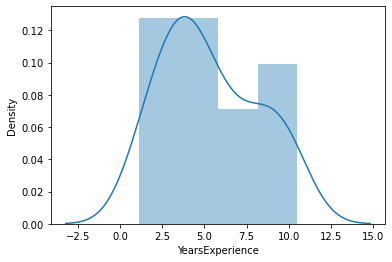

In [5]:
sns.distplot(salaryData['YearsExperience'])

C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

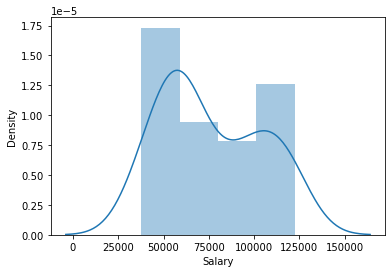

In [6]:
sns.distplot(salaryData['Salary'])

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

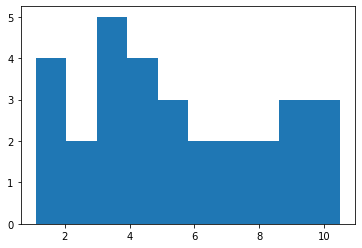

In [7]:
plt.hist(salaryData.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x17d00171fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17d001825b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d00171d00>],
 'medians': [<matplotlib.lines.Line2D at 0x17d00182b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d00182e20>],
 'means': []}

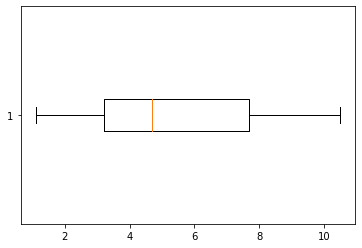

In [9]:
plt.boxplot(salaryData.YearsExperience,0,"rs",0)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

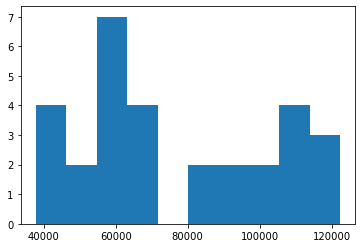

In [10]:
plt.hist(salaryData.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x17d0024c820>,
 'caps': [<matplotlib.lines.Line2D at 0x17d0024cdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d0024c670>],
 'medians': [<matplotlib.lines.Line2D at 0x17d0025a3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d0025a670>],
 'means': []}

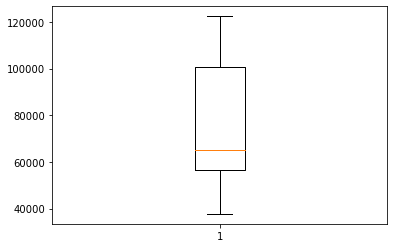

In [11]:
plt.boxplot(salaryData.Salary)

Text(0, 0.5, 'Salary')

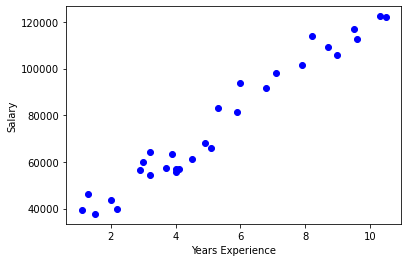

In [12]:
plt.plot(salaryData.YearsExperience,salaryData.Salary,"bo");
plt.xlabel("Years Experience");plt.ylabel("Salary")

In [6]:
salaryData.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
np.corrcoef(salaryData.Salary,salaryData.YearsExperience)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

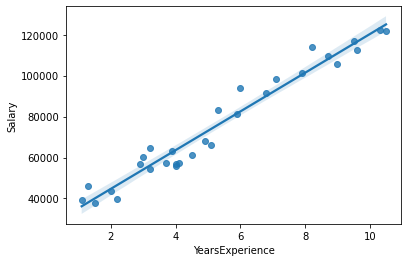

In [8]:
sns.regplot(x=salaryData['YearsExperience'],y=salaryData['Salary'])

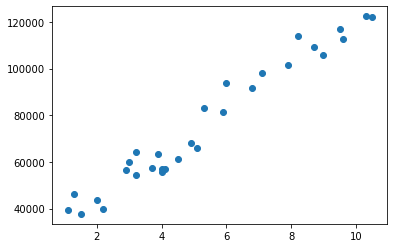

In [14]:
plt.scatter(salaryData.YearsExperience,salaryData.Salary)

In [15]:
model1 = LinearRegression()
model1.fit(salaryData.YearsExperience.values.reshape(-1,1),salaryData.Salary)

LinearRegression()

In [16]:
pred1 = model1.predict(salaryData.YearsExperience.values.reshape(-1,1))
model1.score(salaryData.YearsExperience.values.reshape(-1,1),salaryData.Salary)

0.9569566641435086

In [18]:
rmse1 = np.sqrt(np.mean((pred1-salaryData.Salary)**2))
rmse1

5592.043608760662

In [23]:
model1.coef_

array([9449.96232146])

In [24]:
model1.intercept_

25792.20019866871

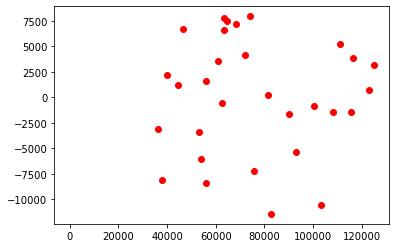

In [32]:
plt.scatter(pred1,(pred1-salaryData.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300) 

(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.0258726 ,  -9507.42248153,  -7566.81909046,  -5626.21569939,
         -3685.61230832,  -1745.00891726,    195.59447381,   2136.19786488,
          4076.80125595,   6017.40464702,   7958.00803809]),
 <BarContainer object of 10 artists>)

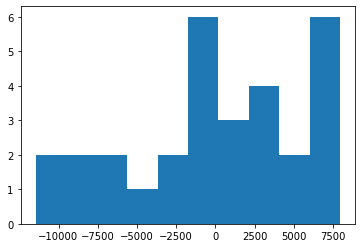

In [29]:
plt.hist(pred1-salaryData.Salary)

In [35]:
#Fitting Quadratic Regression 
salaryData["YE_sqrd"] = salaryData.YearsExperience*salaryData.YearsExperience
model2 = LinearRegression()
model2.fit(X = salaryData.iloc[:,[0,2]],y=salaryData.Salary)

LinearRegression()

In [36]:
pred2 = model2.predict(salaryData.iloc[:,[0,2]])
model2.score(salaryData.iloc[:,[0,2]],salaryData.Salary)

0.956975168321065

In [38]:
rmse2 = np.sqrt(np.mean((pred2-salaryData.Salary)**2))
model2.coef_

array([9259.2838882 ,   16.39256632])

In [39]:
model2.intercept_

26214.932677059587

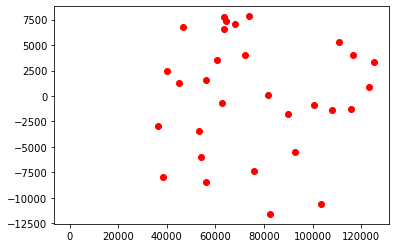

In [40]:
plt.scatter(pred2,(pred2-salaryData.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=200)

(array([2., 2., 2., 1., 2., 6., 3., 3., 3., 6.]),
 array([-11579.23160621,  -9637.8433299 ,  -7696.45505359,  -5755.06677728,
         -3813.67850097,  -1872.29022467,     69.09805164,   2010.48632795,
          3951.87460426,   5893.26288057,   7834.65115687]),
 <BarContainer object of 10 artists>)

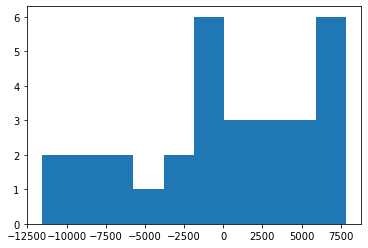

In [41]:
plt.hist(pred2-salaryData.Salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11579.23160621, -10568.70328032,  -8432.49900158,  -7925.2948312 ,
          -7338.39552754,  -6009.68256145,  -5490.80244851,  -3437.2825644 ,
          -2923.02004067,  -1801.94461653,  -1419.54415082,  -1311.44127464,
           -915.66454211,   -642.52922522,     52.33285105,    933.64408643,
           1274.07071874,   1567.50099842,   2409.74178358,   3372.69393997,
           3509.69729633,   3979.79691585,   4041.00924659,   5294.2855428 ,
           6557.34929099,   6773.69725209,   7102.65964195,   7372.55565853,
           7720

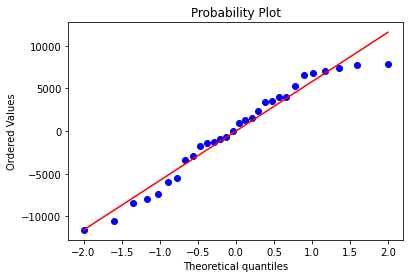

In [43]:
st.probplot(pred2-salaryData.Salary,dist="norm",plot=pylab)

In [47]:
# Let us prepare a model by applying transformation on dependent variable
salaryData["Salary_sqrt"] = np.sqrt(salaryData.Salary)
model3 = LinearRegression()
model3.fit(X = salaryData.iloc[:,[0,2]],y=salaryData.Salary_sqrt)

LinearRegression()

In [49]:
pred3 = model3.predict(salaryData.iloc[:,[0,2]])
model3.score(salaryData.iloc[:,[0,2]],salaryData.Salary_sqrt)

1.0

In [52]:
rmse3 = np.sqrt(np.mean(((pred3)**2-salaryData.Salary)**2))
model3.coef_

array([7.22355641e-16, 1.00000000e+00])

In [53]:
model3.intercept_

0.0

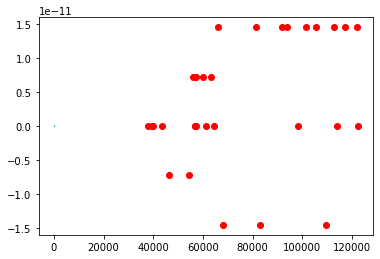

In [55]:
plt.scatter((pred3)**2,((pred3)**2-salaryData.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)

(array([ 3.,  0.,  2.,  0.,  0., 12.,  0.,  4.,  0.,  9.]),
 array([-1.45519152e-11, -1.16415322e-11, -8.73114914e-12, -5.82076609e-12,
        -2.91038305e-12,  0.00000000e+00,  2.91038305e-12,  5.82076609e-12,
         8.73114914e-12,  1.16415322e-11,  1.45519152e-11]),
 <BarContainer object of 10 artists>)

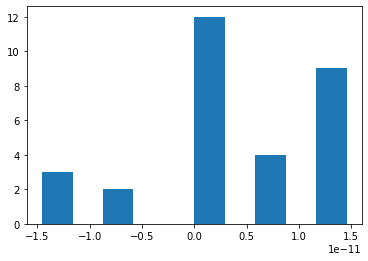

In [56]:
plt.hist((pred3)**2-salaryData.Salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-1.45519152e-11, -1.45519152e-11, -1.45519152e-11, -7.27595761e-12,
         -7.27595761e-12,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  7.27595761e-12,  7.27595761e-12,  7.27595761e-12,
          7.27595761e-12,  1.45519152e-11,  1.45519152e-11,  1.45519152e-11,
          1.45519152e-11,  1.45519152e-11,  1.45519152e-11,  1.45519152e-11,
          1.455

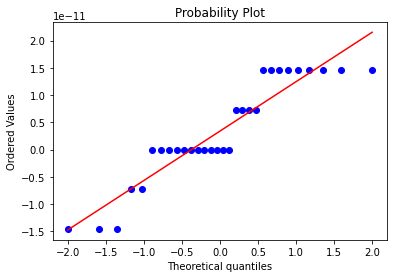

In [58]:
st.probplot((pred3)**2-salaryData.Salary,dist="norm",plot=pylab)

In [61]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = salaryData.YearsExperience.values.reshape(-1,1),y=salaryData.Salary_sqrt)

LinearRegression()

In [63]:
pred4 = model4.predict(salaryData.YearsExperience.values.reshape(-1,1))
model4.score(salaryData.YearsExperience.values.reshape(-1,1),salaryData.Salary_sqrt)

0.949835353386529

In [65]:
rmse4 = np.sqrt(np.mean(((pred4)**2-salaryData.Salary)**2))
model4.coef_

array([17.05653205])

In [66]:
model4.intercept_

180.70022140543102

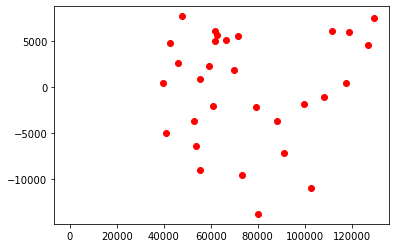

In [67]:
plt.scatter((pred4)**2,((pred4)**2-salaryData.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-13828.69028846, -11050.86024821,  -9592.87606245,  -9087.7927052 ,
          -7188.79486389,  -6386.38770647,  -5047.25654489,  -3716.2247755 ,
          -3666.45744854,  -2214.31520188,  -2099.92727082,  -1795.3008483 ,
          -1129.42246716,    442.25167088,    499.84027951,    912.2072948 ,
           1904.45347807,   2254.01864794,   2619.74762985,   4617.48739174,
           4822.50926219,   5007.32752837,   5171.87910997,   5628.15169638,
           5735.40083327,   6005.93139855,   6113.66227   ,   6170.32752837,
           7579

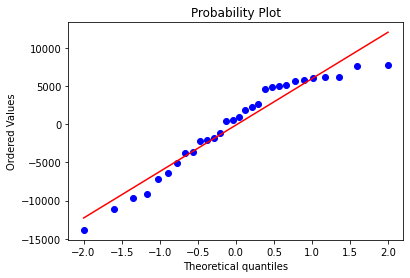

In [68]:
st.probplot((pred4)**2-salaryData.Salary,dist="norm",plot=pylab)

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69028846, -11672.72400793,  -9516.75772739,  -7360.79144686,
         -5204.82516632,  -3048.85888579,   -892.89260525,   1263.07367528,
          3419.03995582,   5575.00623635,   7730.97251689]),
 <BarContainer object of 10 artists>)

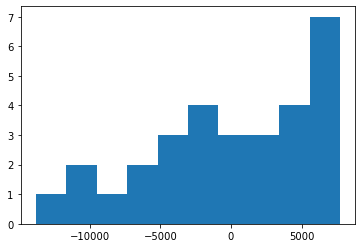

In [69]:
plt.hist((pred4)**2-salaryData.Salary)